### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 8


### Дисциплина: Методы машинного обучения

##### Студент:  Матюшкин Денис Владимирович
##### Группа:   НПИбд-02-21

## Москва 2024
***

### Вариант № 19

Текст задания:

1. Набор данных oxford_iiit_pet с изменением разрешения до 96x96

2. Классы с метками 22,24,32,34

3. Требования к архитектуре сети MLP:

- Последовательный API со списком слоев при создании

- Функция потерь: категориальная кросс-энтропия

- Кол-во скрытых слоев 5

- Кол-во нейронов 60 в первом скрытом слое, увеличивающееся на 10 с каждым последующим скрытым слоем

- Использование слоев с регуляризацией L1

4. Требования к архитектуре сети трансформер:

- Функция потерь: разреженная категориальная кросс-энтропия

5. Показатель качества многоклассовой классификации:

- минимальная точность классов, где точность (precision) класса равна доле правильных предсказаний для всех точек, относимых классификатором к этому классу.


### Решение:

1. Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую, валидационную и тестовую выборки. Если при дальнейшей работе с данными возникнет нехватка вычислительных ресурсов, то разрешение изображений можно уменьшить.

In [1]:
!pip show keras

Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow


In [2]:
!pip install --upgrade tensorflow keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 26.6 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [3]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

In [4]:
%load_ext autoreload
%autoreload 2
import keras
from keras import layers, models, losses, callbacks
from keras import ops

import numpy as np
import matplotlib.pyplot as plt
import json
import re
import string
from IPython.display import display, HTML

import tensorflow as tf
import tensorflow_datasets as tfds
import warnings
warnings.filterwarnings("ignore")

In [5]:
ds = tfds.load("oxford_iiit_pet", split=['train', 'test'])
df_train = tfds.as_dataframe(ds[0])
df_test = tfds.as_dataframe(ds[1])

df_train.shape, df_test.shape

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/3680 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/incomplete.OBKE7K_3.2.0/oxford_iiit_pet-train.tfrecord*...…

Generating test examples...:   0%|          | 0/3669 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/incomplete.OBKE7K_3.2.0/oxford_iiit_pet-test.tfrecord*...:…

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


((3680, 5), (3669, 5))

In [6]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [7]:
test_data, validation_data = train_test_split(df_test, test_size=0.4, random_state=42)

df_test = pd.DataFrame(test_data)
df_validation = pd.DataFrame(validation_data)

df_train.shape, df_test.shape, df_validation.shape

((3680, 5), (2201, 5), (1468, 5))

In [8]:
df_train.head()

,file_name,image,label,segmentation_mask,species
0,b'Sphynx_158.jpg',"[[[3, 3, 3], [5, 3, 4], [7, 5, 6], [4, 2, 3], ...",33,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0
1,b'english_cocker_spaniel_135.jpg',"[[[5, 9, 8], [3, 4, 0], [11, 24, 4], [36, 51, ...",12,"[[[3], [3], [3], [3], [3], [3], [3], [3], [3],...",1
2,b'British_Shorthair_181.jpg',"[[[44, 32, 6], [44, 34, 7], [44, 34, 7], [41, ...",9,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0
3,b'Siamese_161.jpg',"[[[108, 130, 117], [114, 133, 127], [108, 128,...",32,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0
4,b'Sphynx_178.jpg',"[[[237, 228, 91], [236, 228, 93], [230, 225, 8...",33,"[[[2], [2], [2], [2], [2], [2], [2], [2], [2],...",0


2. Оставьте в наборе изображения, указанных в индивидуальном задании, и визуализируйте по одному изображению из каждого класса, подписывая изображение меткой класса.

In [9]:
df_train['label'].unique(), df_test['label'].unique(), df_validation['label'].unique()

(array([33, 12,  9, 32,  2, 22, 36,  5,  6, 28, 10, 14,  3,  0,  1, 17, 25,
        27,  8, 15, 29, 13, 30, 34, 16, 11, 20, 21, 19, 31,  7, 18, 26, 23,
        24,  4, 35]),
 array([20, 25, 23, 21,  7,  3, 35, 18, 26, 19, 11,  2,  4, 27, 13, 34, 12,
        32, 31, 30, 29,  8, 16, 22, 28, 10, 17, 33, 36,  5,  6,  0, 15,  9,
         1, 14, 24]),
 array([18, 11, 12,  6, 27,  9,  8, 15,  0,  1, 14, 36, 20,  4, 23, 32,  7,
        19, 10, 25, 28,  3, 34, 21, 24, 33, 16,  5,  2, 29, 26, 31, 30, 22,
        13, 35, 17]))

In [10]:
label_map = {22: 0, 24: 1, 32: 2, 34: 3}

df_train = df_train.loc[df_train['label'].isin([22, 24, 32, 34])]
df_test = df_test.loc[df_test['label'].isin([22, 24, 32, 34])]
df_validation = df_validation.loc[df_validation['label'].isin([22, 24, 32, 34])]

df_train['label'] = df_train['label'].map(label_map)
df_test['label'] = df_test['label'].map(label_map)
df_validation['label'] = df_validation['label'].map(label_map)

df_train.shape, df_test.shape, df_validation.shape

((395, 5), (250, 5), (139, 5))

In [11]:
df_train.iloc[0]['image'].shape

(375, 500, 3)

In [12]:
from PIL import Image

In [13]:
def resize_image(image, size=(96, 96)):
    image = Image.fromarray(image)
    image = image.resize(size, Image.ANTIALIAS)
    return np.array(image)

In [14]:
df_train['image'] = df_train['image'].apply(lambda x: resize_image(x, size=(96, 96)))
df_test['image'] = df_test['image'].apply(lambda x: resize_image(x, size=(96, 96)))
df_validation['image'] = df_validation['image'].apply(lambda x: resize_image(x, size=(96, 96)))

In [15]:
df_train.iloc[0]['image'].shape

(96, 96, 3)

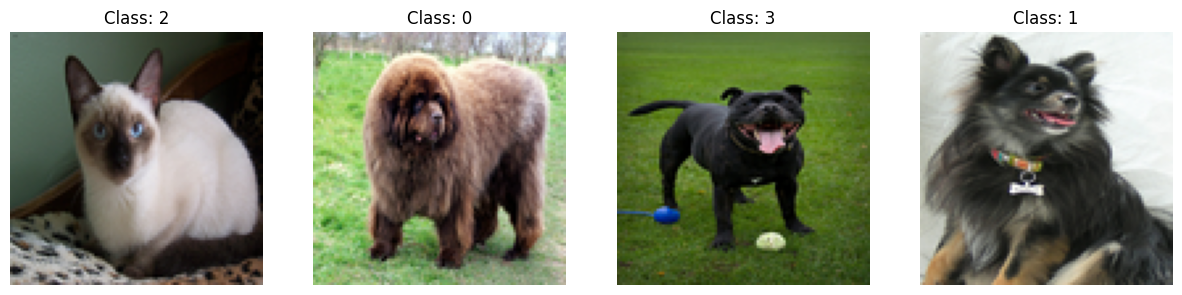

In [16]:
images_by_class = {}

for index, row in df_train.iterrows():
    label = row['label']
    if label not in images_by_class:
        images_by_class[label] = row['image']
    if len(images_by_class) == len(label_map):
        break

fig, axes = plt.subplots(1, len(label_map), figsize=(15, 5))

for idx, (label, image) in enumerate(images_by_class.items()):
    axes[idx].imshow(image)
    axes[idx].set_title(f"Class: {label}")
    axes[idx].axis('off')

plt.show()

3. Постройте нейронные сети различных архитектур (MLP, CNN, RNN, трансформер) для задачи многоклассовой классификации изображений (архитектуры и требования к сетям указаны в индивидуальном задании), используя функции потерь, указанные в индивидуальном задании. Подберите такие параметры, как функции активации, оптимизатор, начальная скорость обучения, размер мини-пакета и др. самостоятельно, обеспечивая обучение нейронных сетей. Обучайте нейронные сети с использованием валидационной выборки, сформированной в п. 1. Останавливайте переобучение нейронных сетей в случае роста потерь на валидационной выборке на нескольких эпохах обучения подряд.

In [74]:
train_labels = df_train['label'].to_numpy(dtype=np.float32)
test_labels = df_test['label'].to_numpy(dtype=np.float32)
validation_labels = df_validation['label'].to_numpy(dtype=np.float32)

train_labels.shape, test_labels.shape, validation_labels.shape

((395,), (250,), (139,))

In [75]:
train_images = np.zeros(shape=(df_train.shape[0],96,96,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],96,96,3), dtype=np.float32)
validation_images = np.zeros(shape=(df_validation.shape[0],96,96,3), dtype=np.float32)

train_images.shape, test_images.shape, validation_images.shape

((395, 96, 96, 3), (250, 96, 96, 3), (139, 96, 96, 3))

In [76]:
for idx in range(train_labels.shape[0]):
  train_images[idx,:,:] = np.array(Image.fromarray(df_train.iloc[idx]['image']).resize((96,96)))

for idx in range(test_labels.shape[0]):
  test_images[idx,:,:] = np.array(Image.fromarray(df_test.iloc[idx]['image']).resize((96,96)))

for idx in range(validation_labels.shape[0]):
  validation_images[idx,:,:] = np.array(Image.fromarray(df_validation.iloc[idx]['image']).resize((96,96)))

train_images.shape, test_images.shape, validation_images.shape

((395, 96, 96, 3), (250, 96, 96, 3), (139, 96, 96, 3))

In [77]:
train_images /= 255.0
test_images /= 255.0
validation_images /= 255.0

In [78]:
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [79]:
input_shape = (96, 96, 3)
num_classes = 4

In [80]:
train_labels_one_hot = to_categorical(train_labels, num_classes)
validation_labels_one_hot = to_categorical(validation_labels, num_classes)
test_labels_one_hot = to_categorical(test_labels, num_classes)

train_labels_one_hot.shape, test_labels_one_hot.shape, validation_labels_one_hot.shape

((395, 4), (250, 4), (139, 4))

### Сеть MLP:

In [81]:
mlp_model = models.Sequential()
mlp_model.add(layers.Flatten(input_shape=input_shape))
neurons = 60
for i in range(5):
    mlp_model.add(layers.Dense(neurons, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
    neurons += 10
mlp_model.add(layers.Dense(num_classes, activation='softmax'))

mlp_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [82]:
history_mlp = mlp_model.fit(
    train_images, train_labels_one_hot,
    epochs=50,
    batch_size=32,
    validation_data=(validation_images, validation_labels_one_hot),
    callbacks=[early_stopping]
)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.2188 - loss: 109.3200 - val_accuracy: 0.2734 - val_loss: 39.5755
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.2745 - loss: 38.6584 - val_accuracy: 0.2446 - val_loss: 28.1581
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.3179 - loss: 26.7624 - val_accuracy: 0.2518 - val_loss: 21.9981
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2634 - loss: 20.8322 - val_accuracy: 0.2734 - val_loss: 17.8113
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.2405 - loss: 17.0731 - val_accuracy: 0.2734 - val_loss: 14.9789
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.2670 - loss: 14.3946 - val_accuracy: 0.2734 - val_loss: 12.6815
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.2330 - loss: 12.1770 - val_accuracy: 0.2734 - val_loss: 10.6606
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.2551 - loss: 10.2156 - val_accu

### Трансформер:

In [98]:
train_images_tr = np.zeros(shape=(df_train.shape[0],96,96,3), dtype=np.float32)
for idx in range(df_train.shape[0]):
    train_images_tr[idx] = df_train.iloc[idx]['image']

train_images_tr.shape

(395, 96, 96, 3)

In [99]:
validation_images_tr = np.zeros(shape=(df_validation.shape[0],96,96,3), dtype=np.float32)
for idx in range(df_validation.shape[0]):
    validation_images_tr[idx] = df_validation.iloc[idx]['image']

validation_images_tr.shape

(139, 96, 96, 3)

In [100]:
num_classes = 4
input_shape = (96, 96, 3)

learning_rate = 0.001
weight_decay = 0.0001
batch_size = 32
num_epochs = 24
image_size = 96
patch_size = 16
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]
transformer_layers = 8
mlp_head_units = [
    2048,
    1024,
]

In [101]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ],
    name="data_augmentation",
)

In [102]:
print("Пример значений пикселей до нормализации:")
print(train_images_tr[0][0][0])
print(validation_images_tr[0][0][0])

Пример значений пикселей до нормализации:
[100. 123. 112.]
[255. 255. 255.]


In [103]:
data_augmentation.layers[0].adapt(train_images_tr)
data_augmentation.layers[0].adapt(validation_images_tr)

In [104]:
print("Пример значений пикселей после нормализации:")
print(data_augmentation(train_images_tr)[0][0][0].numpy())
print(data_augmentation(validation_images_tr)[0][0][0].numpy())

Пример значений пикселей после нормализации:
[-0.36532834  0.02451662  0.0996474 ]
[-1.1727245 -1.1247673 -0.8702564]


In [105]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        input_shape = ops.shape(images)
        batch_size = input_shape[0]
        height = input_shape[1]
        width = input_shape[2]
        channels = input_shape[3]
        num_patches_h = height // self.patch_size
        num_patches_w = width // self.patch_size
        patches = keras.ops.image.extract_patches(images, size=self.patch_size)
        patches = ops.reshape(
            patches,
            (
                batch_size,
                num_patches_h * num_patches_w,
                self.patch_size * self.patch_size * channels,
            ),
        )
        return patches

    def get_config(self):
        config = super().get_config()
        config.update({"patch_size": self.patch_size})
        return config


Image size: 96 X 96
Patch size: 16 X 16
Patches per image: 36
Elements per patch: 768


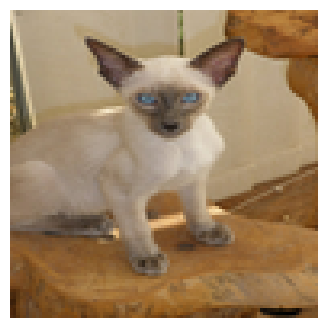

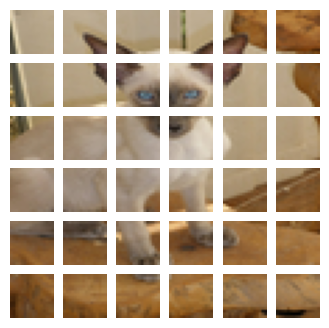

In [106]:
plt.figure(figsize=(4, 4))
image = train_images_tr[np.random.choice(range(train_images_tr.shape[0]))]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = ops.image.resize(
    ops.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = ops.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(ops.convert_to_numpy(patch_img).astype("uint8"))
    plt.axis("off")

In [107]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = ops.expand_dims(
            ops.arange(start=0, stop=self.num_patches, step=1), axis=0
        )
        projected_patches = self.projection(patch)
        encoded = projected_patches + self.position_embedding(positions)
        return encoded

    def get_config(self):
        config = super().get_config()
        config.update({"num_patches": self.num_patches})
        return config

In [108]:
def create_vit_classifier():
    inputs = keras.Input(shape=input_shape)
    augmented = data_augmentation(inputs)
    patches = Patches(patch_size)(augmented)
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    for _ in range(transformer_layers):
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        x2 = layers.Add()([attention_output, encoded_patches])
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = layers.Dense(transformer_units[0], activation="relu", kernel_regularizer=keras.regularizers.l2(0.001))(x3)
        x3 = layers.Dense(transformer_units[1], activation="relu", kernel_regularizer=keras.regularizers.l2(0.001))(x3)
        x3 = layers.Dropout(0.2)(x3)  # Увеличил значение Dropout
        encoded_patches = layers.Add()([x3, x2])

    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    features = layers.Dense(mlp_head_units[0], activation="relu", kernel_regularizer=keras.regularizers.l2(0.001))(representation)
    features = layers.Dropout(0.5)(features)
    features = layers.Dense(mlp_head_units[1], activation="relu", kernel_regularizer=keras.regularizers.l2(0.001))(features)
    logits = layers.Dense(num_classes)(features)

    model = keras.Model(inputs=inputs, outputs=logits)
    return model


In [109]:
ViT = create_vit_classifier()
optimizer = keras.optimizers.AdamW(
    learning_rate=learning_rate, weight_decay=weight_decay
)
ViT.compile(
    optimizer=optimizer,
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [110]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint_filepath = "ViT_checkpoint.weights.h5"
checkpoint_callback = keras.callbacks.ModelCheckpoint(
    checkpoint_filepath,
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=True,
)

history = ViT.fit(
    x=train_images_tr,
    y=train_labels,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_data=(validation_images_tr, validation_labels),
    callbacks=[early_stopping, checkpoint_callback],
)

Epoch 1/24
13/13 ━━━━━━━━━━━━━━━━━━━━ 47s 786ms/step - accuracy: 0.2887 - loss: 8.6086 - val_accuracy: 0.4748 - val_loss: 6.8783
Epoch 2/24
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 547ms/step - accuracy: 0.5029 - loss: 6.7781 - val_accuracy: 0.4820 - val_loss: 6.1372
Epoch 3/24
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 675ms/step - accuracy: 0.5258 - loss: 6.2304 - val_accuracy: 0.4964 - val_loss: 6.0257
Epoch 4/24
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 693ms/step - accuracy: 0.6307 - loss: 5.8996 - val_accuracy: 0.5468 - val_loss: 5.9223
Epoch 5/24
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 543ms/step - accuracy: 0.6412 - loss: 5.8531 - val_accuracy: 0.5540 - val_loss: 5.8882
Epoch 6/24
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 614ms/step - accuracy: 0.6165 - loss: 5.8172 - val_accuracy: 0.5683 - val_loss: 5.8108
Epoch 7/24
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 692ms/step - accuracy: 0.7086 - loss: 5.5414 - val_accuracy: 0.5899 - val_loss: 5.7007
Epoch 8/24
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 589ms/step - accuracy: 0.6816 - loss: 5.6402 - val_accurac

In [111]:
ViT.load_weights(checkpoint_filepath)

In [112]:
ViT.save("ViT.keras")

4. Вычислите и выведите в отчете матрицы ошибок нейронных сетей (tf.math.confusion_matrix) для обучающей и тестовой выборок.

In [114]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [115]:
def plot_confusion_matrix(cm, class_names, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Предсказанные метки')
    plt.ylabel('Истинные метки')
    plt.title(title)
    plt.show()

class_names = ["Класс 0", "Класс 1", "Класс 2", "Класс 3"]

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


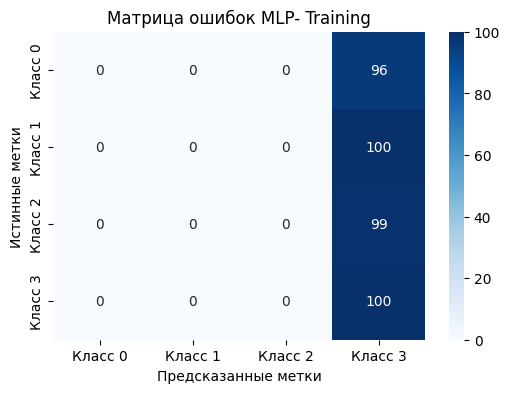

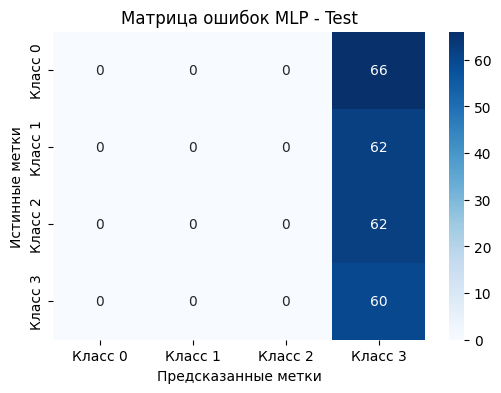

In [116]:
train_predictions_mlp = mlp_model.predict(train_images)
test_predictions_mlp = mlp_model.predict(test_images)

train_pred_labels_mlp = tf.argmax(train_predictions_mlp, axis=1)
test_pred_labels_mlp = tf.argmax(test_predictions_mlp, axis=1)

train_cm_mlp = tf.math.confusion_matrix(train_labels, train_pred_labels_mlp)
test_cm_mlp = tf.math.confusion_matrix(test_labels, test_pred_labels_mlp)

plot_confusion_matrix(train_cm_mlp.numpy(), class_names, title='Матрица ошибок MLP- Training')
plot_confusion_matrix(test_cm_mlp.numpy(), class_names, title='Матрица ошибок MLP - Test')

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 222ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step


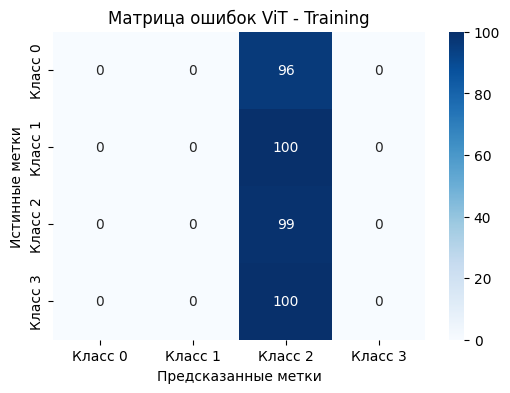

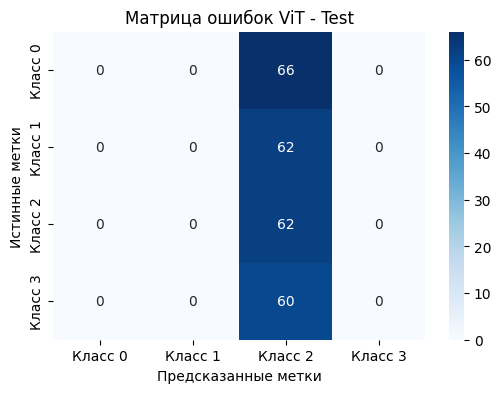

In [117]:
train_predictions_vit = ViT.predict(train_images)
test_predictions_vit = ViT.predict(test_images)

train_pred_labels_vit = tf.argmax(train_predictions_vit, axis=1)
test_pred_labels_vit = tf.argmax(test_predictions_vit, axis=1)

train_cm_vit = tf.math.confusion_matrix(train_labels, train_pred_labels_vit)
test_cm_vit = tf.math.confusion_matrix(test_labels, test_pred_labels_vit)

plot_confusion_matrix(train_cm_vit.numpy(), class_names, title='Матрица ошибок ViT - Training')
plot_confusion_matrix(test_cm_vit.numpy(), class_names, title='Матрица ошибок ViT - Test')

5. Визуализируйте кривые обучения построенных моделей для показателей потерь на обучающей и валидационной выборках на одном рисунке в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду. Используйте для визуализации относительные потери (потери, деленные на начальные потери на первой эпохе).

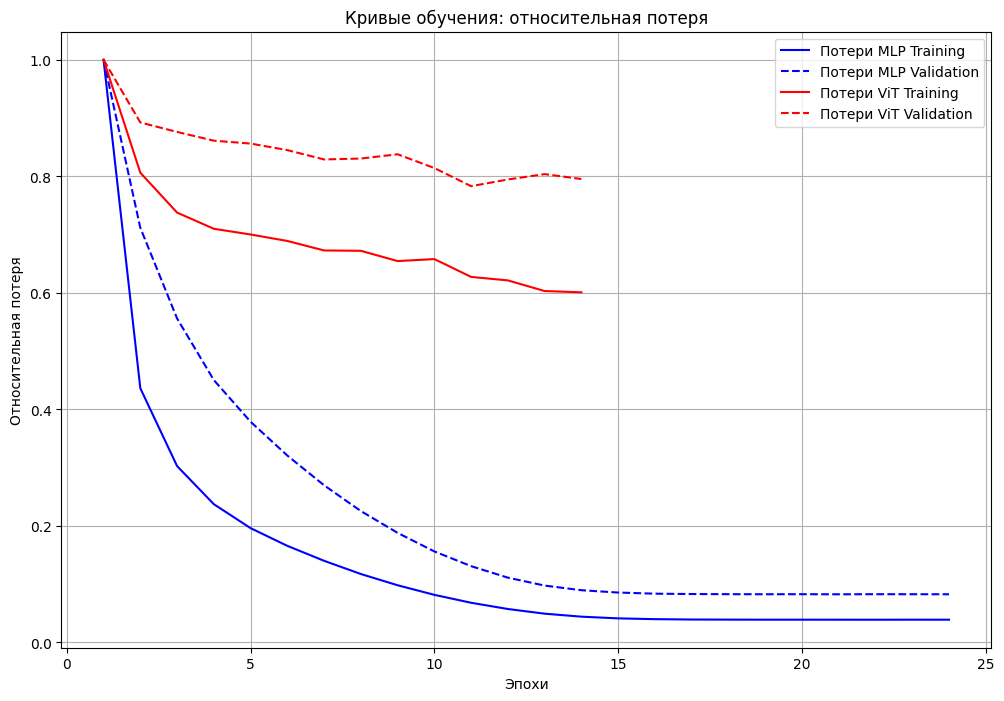

In [139]:
def compute_relative_loss(losses):
    initial_loss = losses[0]
    relative_losses = [loss / initial_loss for loss in losses]
    return relative_losses

mlp_train_loss = history_mlp.history['loss']
mlp_val_loss = history_mlp.history['val_loss']
vit_train_loss = history.history['loss']
vit_val_loss = history.history['val_loss']

mlp_train_loss_rel = compute_relative_loss(mlp_train_loss)
mlp_val_loss_rel = compute_relative_loss(mlp_val_loss)
vit_train_loss_rel = compute_relative_loss(vit_train_loss)
vit_val_loss_rel = compute_relative_loss(vit_val_loss)

epochs = range(1, len(mlp_train_loss) + 1)
epochs_vit = range(1, len(vit_train_loss) + 1)

plt.figure(figsize=(12, 8))
plt.plot(epochs, mlp_train_loss_rel, 'b-', label='Потери MLP Training')
plt.plot(epochs, mlp_val_loss_rel, 'b--', label='Потери MLP Validation')

plt.plot(epochs_vit, vit_train_loss_rel, 'r-', label='Потери ViT Training')
plt.plot(epochs_vit, vit_val_loss_rel, 'r--', label='Потери ViT Validation')

plt.title('Кривые обучения: относительная потеря')
plt.xlabel('Эпохи')
plt.ylabel('Относительная потеря')
plt.legend()

plt.grid()
plt.show()

6. Оцените качество многоклассовой классификации нейронными сетями на тестовой выборке при помощи показателя качества, указанного в индивидуальном задании, и выведите название нейронной сети с лучшим качеством.

In [119]:
from sklearn.metrics import precision_score

In [135]:
mlp_test_predictions = mlp_model.predict(test_images)
mlp_test_pred_labels = np.argmax(mlp_test_predictions, axis=1)

vit_test_predictions = ViT.predict(test_images)
vit_test_pred_labels = np.argmax(vit_test_predictions, axis=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 205ms/step


In [136]:
mlp_precision_per_class = precision_score(test_labels, mlp_test_pred_labels, average=None)
vit_precision_per_class = precision_score(test_labels, vit_test_pred_labels, average=None)

min_mlp_precision = np.min(mlp_precision_per_class)
min_vit_precision = np.min(vit_precision_per_class)

In [138]:
non_zero_mlp_precisions = [p for p in mlp_precision_per_class if p > 0]
non_zero_vit_precisions = [p for p in vit_precision_per_class if p > 0]

if non_zero_mlp_precisions:
    min_mlp_precision = min(non_zero_mlp_precisions)
else:
    min_mlp_precision = 0

if non_zero_vit_precisions:
    min_vit_precision = min(non_zero_vit_precisions)
else:
    min_vit_precision = 0

if min_mlp_precision > min_vit_precision:
    best_model = 'MLP'
    best_precision = min_mlp_precision
else:
    best_model = 'ViT'
    best_precision = min_vit_precision

print(f"Наилучшей моделью является {best_model} с минимальной точностью класса {best_precision:.3f}")

Наилучшей моделью является ViT с минимальной точностью класса 0.248
